In [45]:
from TwoStepRidge import TwoStepRidgeRegression
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/michielstock/SVN_GITHUB/Interesting_projects/RLScore/')
%matplotlib inline

mse = lambda Y, P : np.mean((Y - P)**2)

Generate some random data

In [46]:
n_u, n_v = 250, 500

# features
X_u = np.random.randn(n_u, n_v)
X_v = np.random.rand(n_v, n_v)

# kernels

K_u = X_u.dot(X_u.T)
K_v = X_v.dot(X_v.T)

# parameters
A = np.random.randn(10, 100)

Y = X_u[:,:10].dot(A).dot(X_v[:,:100].T) + np.random.randn(n_u, n_v)

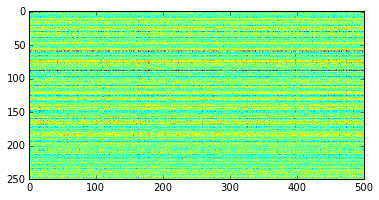

In [47]:
plt.imshow(Y, interpolation='nearest')

Make a two-step RLS model

In [48]:
from rlscore.learner import TwoStepRLS

In [49]:
reg_u, reg_v = (0.1, 1e-2)

two_step_model = TwoStepRidgeRegression(Y, K_u, K_v)
two_step_model.train_model((reg_u, reg_v))

In [50]:
two_step_rlscore = TwoStepRLS(Y=Y, K1=K_u, K2=K_v, regparam1=reg_u, regparam2=reg_v)
two_step_rlscore.solve(regparam1=reg_u, regparam2=reg_v)

## Compare RLScore with own implementation

In [51]:
# LOOCV Setting A

LOOV_A = two_step_model.lo_setting_A()
LOOV_A_RLScore = two_step_rlscore.in_sample_loo().reshape(Y.shape, order='F')

# mse
print('MSE Setting {} : {}'.format('A', mse(Y, LOOV_A)))

MSE Setting A : 32.2611703815


In [52]:
np.allclose(LOOV_A_RLScore, LOOV_A)

True

In [53]:
# LOOCV Setting B (rows)

LOOV_B = two_step_model.lo_setting_B()
LOOV_B_RLScore = two_step_rlscore.leave_x1_out().reshape(Y.shape, order='F')

# mse
print('MSE Setting {} : {}'.format('B', mse(Y, LOOV_B)))

MSE Setting B : 135.059654027


In [54]:
np.allclose(LOOV_B, LOOV_B_RLScore)

True

In [55]:
# LOOCV Setting C (columns)

LOOV_C = two_step_model.lo_setting_C()
LOOV_C_RLScore = two_step_rlscore.leave_x2_out().reshape(Y.shape, order='F')


# mse
print('MSE Setting {} : {}'.format('C', mse(Y, LOOV_C)))

MSE Setting C : 33.996664112


In [56]:
np.allclose(LOOV_C, LOOV_C_RLScore)

True

In [57]:
# LOOCV Setting D (both)

LOOV_D = two_step_model.lo_setting_D()
LOOV_D_RLScore = two_step_rlscore.out_of_sample_loo().reshape(Y.shape, order='F')

# mse
print('MSE Setting {} : {}'.format('D', mse(Y, LOOV_D)))

MSE Setting D : 167.70432543


In [58]:
np.allclose(LOOV_D, LOOV_D_RLScore)

True

All holdout values seem to be the same.

Let us compare speed

## Compare speed

In [59]:
# Setting A
%timeit two_step_model.lo_setting_A()
%timeit two_step_rlscore.in_sample_loo().reshape(Y.shape, order='F')

10 loops, best of 3: 20.1 ms per loop
100 loops, best of 3: 22.3 ms per loop


In [60]:
# Setting B
%timeit two_step_model.lo_setting_B()
%timeit two_step_rlscore.leave_x1_out().reshape(Y.shape, order='F')

10 loops, best of 3: 21.1 ms per loop
10 loops, best of 3: 39.1 ms per loop


In [61]:
# Setting C
%timeit two_step_model.lo_setting_C()
%timeit two_step_rlscore.leave_x2_out().reshape(Y.shape, order='F')

10 loops, best of 3: 20.5 ms per loop
10 loops, best of 3: 99.7 ms per loop


In [62]:
# Setting D
%timeit two_step_model.lo_setting_D()
%timeit two_step_rlscore.out_of_sample_loo().reshape(Y.shape, order='F')

10 loops, best of 3: 32.8 ms per loop
10 loops, best of 3: 21.5 ms per loop
